<h1>**ICP - 9** <h1>
                                                                           <h2>VVS MURTHY KOLLA<h2>
                                                                               <h2>700729142<h2>


<h1>**Autoencoders**<h1>

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
import numpy as np

# Load Fashion MNIST dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshape images to vectors
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define autoencoder model
input_img = Input(shape=(784,))
encoded = Dense(256, activation='relu')(input_img)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(128, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)
autoencoder = Model(input_img, decoded)

# Compile model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

# Train model
history = autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Evaluate model
score = autoencoder.evaluate(x_test, x_test, verbose=0)
print('Test loss:', score)

Epoch 1/50
235/235 [==============================] - 4s 6ms/step - loss: 0.3645 - accuracy: 0.0089 - val_loss: 0.3126 - val_accuracy: 0.0151
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.3044 - accuracy: 0.0149 - val_loss: 0.3007 - val_accuracy: 0.0161
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2962 - accuracy: 0.0161 - val_loss: 0.2964 - val_accuracy: 0.0155
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2917 - accuracy: 0.0159 - val_loss: 0.2929 - val_accuracy: 0.0149
Epoch 5/50
235/235 [==============================] - 1s 6ms/step - loss: 0.2887 - accuracy: 0.0174 - val_loss: 0.2893 - val_accuracy: 0.0197
Epoch 6/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2861 - accuracy: 0.0185 - val_loss: 0.2872 - val_accuracy: 0.0182
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2839 - accuracy: 0.0210 - val_loss: 0.2850 - val_accuracy: 0.0161
Epoch 

In [ ]:
# Generate reconstructed images
decoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


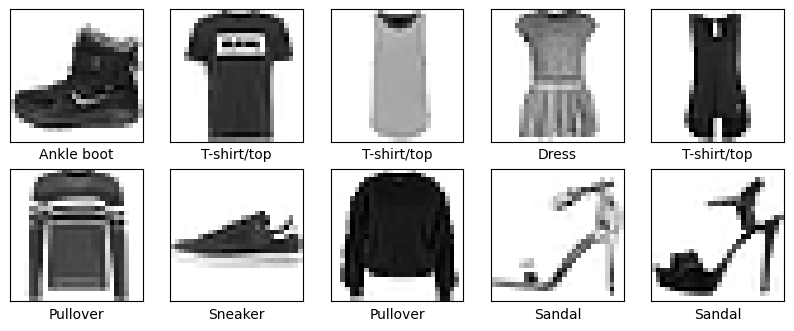

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load the Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Define the class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot some examples of images from the dataset
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()


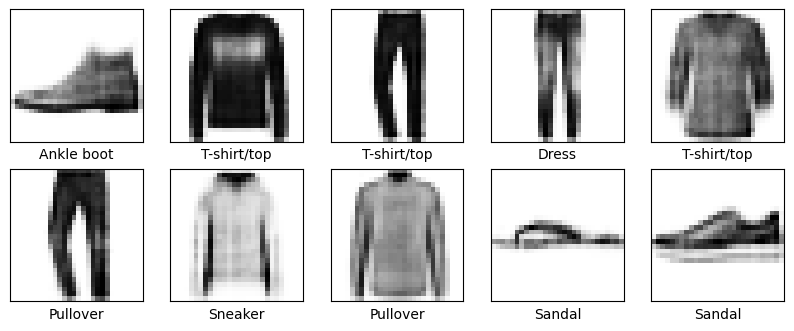

In [ ]:
# Plot some examples of reconstructed images from the dataset
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

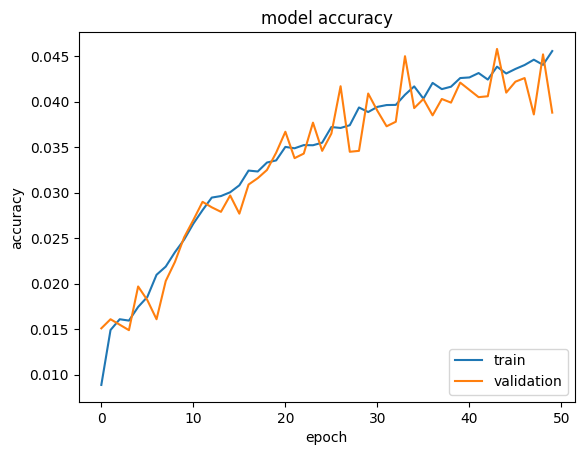

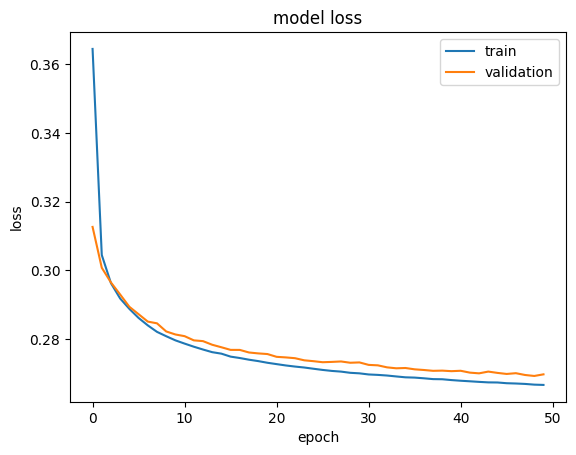

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# plot history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()
# plot history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')

<h1>**Denoisening Autoencoder**<h1>

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
import numpy as np

# Load Fashion MNIST dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshape images to vectors
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define autoencoder model
input_img = Input(shape=(784,))
encoded = Dense(256, activation='relu')(input_img)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(128, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)
autoencoder = Model(input_img, decoded)

import numpy as np

# Add Gaussian noise to training and testing data
noise_factor = 0.1
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)


# Compile model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

# Train model
history = autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Plot the denoised images
decoded_imgs = autoencoder.predict(x_test_noisy)

Epoch 1/50
235/235 [==============================] - 4s 6ms/step - loss: 0.3620 - accuracy: 0.0094 - val_loss: 0.3150 - val_accuracy: 0.0102
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.3061 - accuracy: 0.0133 - val_loss: 0.3025 - val_accuracy: 0.0143
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2980 - accuracy: 0.0141 - val_loss: 0.2970 - val_accuracy: 0.0162
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2931 - accuracy: 0.0156 - val_loss: 0.2941 - val_accuracy: 0.0149
Epoch 5/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2899 - accuracy: 0.0173 - val_loss: 0.2919 - val_accuracy: 0.0161
Epoch 6/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2872 - accuracy: 0.0196 - val_loss: 0.2894 - val_accuracy: 0.0175
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2850 - accuracy: 0.0206 - val_loss: 0.2865 - val_accuracy: 0.0177
Epoch 

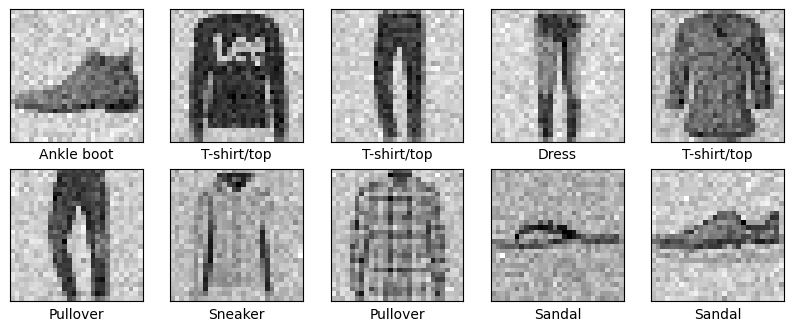

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load the Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Define the class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot some examples of images from the dataset
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()


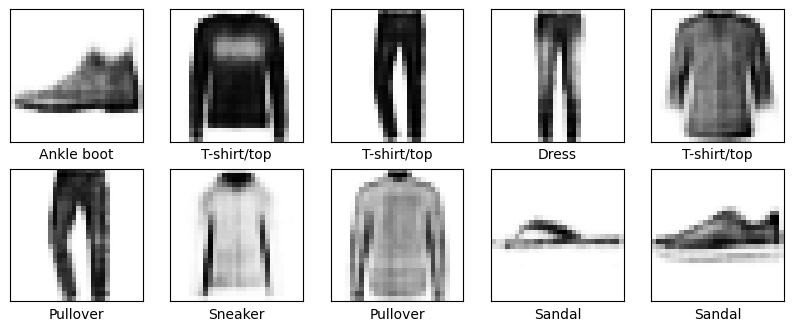

In [ ]:
# Plot some examples of reconstructed images from the dataset
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

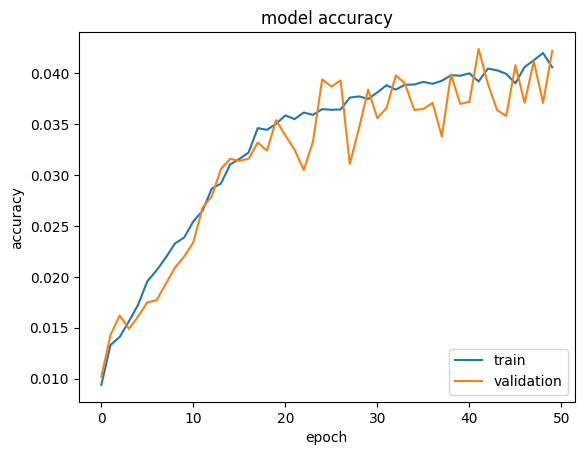

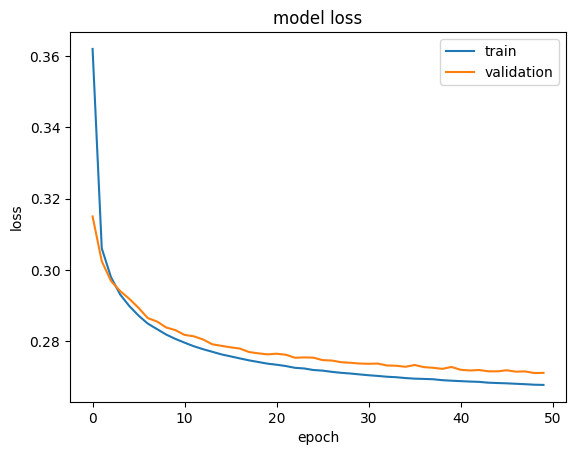

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# plot history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()
# plot history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')